https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv

## Data Discovery

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

def load_data():
  delays = pd.read_csv("2018.csv")
  return delays

delays = load_data()
delays  = delays.iloc[:1000000]

In [ ]:
print(delays.shape)
delays.info()

(1000000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1000000 non-null  object 
 1   OP_CARRIER           1000000 non-null  object 
 2   OP_CARRIER_FL_NUM    1000000 non-null  int64  
 3   ORIGIN               1000000 non-null  object 
 4   DEST                 1000000 non-null  object 
 5   CRS_DEP_TIME         1000000 non-null  int64  
 6   DEP_TIME             975046 non-null   float64
 7   DEP_DELAY            974172 non-null   float64
 8   TAXI_OUT             974574 non-null   float64
 9   WHEELS_OFF           974574 non-null   float64
 10  WHEELS_ON            973728 non-null   float64
 11  TAXI_IN              973728 non-null   float64
 12  CRS_ARR_TIME         1000000 non-null  int64  
 13  ARR_TIME             973728 non-null   float64
 14  ARR_DELAY            971581 non-null 

In [ ]:
null = delays.isnull().sum().sort_values(ascending = False)
percent = (delays.isnull().sum()/delays.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Unnamed: 27,1000000,1.000000
CANCELLATION_CODE,974398,0.974398
LATE_AIRCRAFT_DELAY,818688,0.818688
SECURITY_DELAY,818688,0.818688
NAS_DELAY,818688,0.818688
WEATHER_DELAY,818688,0.818688
CARRIER_DELAY,818688,0.818688
ARR_DELAY,28419,0.028419
AIR_TIME,28029,0.028029
ACTUAL_ELAPSED_TIME,28029,0.028029


Overall, most features have a decent amount of values. We will be dropping [CANCELLATION_CODE, Unnamed: 27] because almost all of their values are NULL

In [ ]:
delays = delays.drop(["CANCELLATION_CODE", "Unnamed: 27"] , axis = 1)
delays.shape

(1000000, 26)

In [ ]:
delays.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1000000.000000,1000000.000000,975046.000000,974172.000000,974574.000000,974574.000000,973728.000000,973728.000000,1000000.000000,973728.000000,...,1000000.000000,999995.000000,971971.000000,971971.000000,1000000.000000,181312.000000,181312.000000,181312.000000,181312.000000,181312.000000
mean,2569.238979,1326.646454,1333.530194,9.755276,17.938042,1359.684666,1478.798345,7.489811,1495.683620,1484.314546,...,0.002427,142.978369,137.227857,111.812023,792.326012,20.246680,4.433650,14.915455,0.089790,25.370847
std,1881.924948,485.001224,495.630011,46.227195,10.645294,495.527724,518.337836,5.825170,509.346402,522.150392,...,0.049205,73.815109,73.132720,71.302721,590.114883,63.471067,34.981913,33.047807,2.889961,50.486239
min,1.000000,1.000000,1.000000,-51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,-60.000000,16.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,922.000000,915.000000,922.000000,-6.000000,11.000000,938.000000,1059.000000,4.000000,1110.000000,1104.000000,...,0.000000,90.000000,84.000000,60.000000,357.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2028.000000,1320.000000,1329.000000,-2.000000,15.000000,1343.000000,1513.000000,6.000000,1522.000000,1518.000000,...,0.000000,125.000000,119.000000,93.000000,631.000000,0.000000,0.000000,2.000000,0.000000,2.000000
75%,4036.000000,1730.000000,1739.000000,6.000000,21.000000,1754.000000,1912.000000,9.000000,1919.000000,1918.000000,...,0.000000,174.000000,168.000000,142.000000,1027.000000,17.000000,0.000000,20.000000,0.000000,31.000000
max,7439.000000,2359.000000,2400.000000,2482.000000,178.000000,2400.000000,2400.000000,258.000000,2400.000000,2400.000000,...,1.000000,704.000000,739.000000,696.000000,4983.000000,2007.000000,2475.000000,1515.000000,593.000000,2454.000000


* How big is your dataset? (in terms of MB) **213.6 MB**
* How many entries does it have? **1,000,000 (Truncated from 7.1M)**
* How many features does it have? **26 (Truncated from 28)**
* Does it contain any categorical data? **Yes**
* Is there any missing value? **Yes**
* What are some basic statistics you can learn right away about this dataset? **Cell Above**

# Data Visualization & Correlations

The subset of flights to/from Virginia will be used as the test set.

In [ ]:
virginia_airports = ["CHO", "LYH", "PHF", "ORF", "RIC", "ROA", "SHD", "DCA", "IAD"]

delays_test = delays[delays["ORIGIN"].isin(virginia_airports) | delays["DEST"].isin(virginia_airports)]
delays_train = delays[~delays["ORIGIN"].isin(virginia_airports) & ~delays["DEST"].isin(virginia_airports)]

print(delays.shape)
print(delays_test.shape, delays_train.shape) #pheww works
# no need for a validation set because cross-validation will be used for hypertuning

(1000000, 26)
(70225, 26) (929775, 26)


Statistics for Virginia Data:

In [ ]:
delays_test.shape

(70225, 26)

In [ ]:
corr_matrix = delays.corr()
desc_list = corr_matrix["DEP_DELAY"].sort_values(ascending=False)
print(desc_list, "\n") # departure delay correlation

desc_list2 = corr_matrix["ARR_DELAY"].sort_values(ascending=False)
print(desc_list2) # arrival delay correlation

DEP_DELAY              1.000000
ARR_DELAY              0.956252
CARRIER_DELAY          0.650078
LATE_AIRCRAFT_DELAY    0.502502
WEATHER_DELAY          0.347939
NAS_DELAY              0.134332
DEP_TIME               0.118467
WHEELS_OFF             0.113663
CRS_DEP_TIME           0.066254
TAXI_OUT               0.065416
CRS_ARR_TIME           0.062236
WHEELS_ON              0.043786
OP_CARRIER_FL_NUM      0.040696
ARR_TIME               0.037536
CANCELLED              0.030876
SECURITY_DELAY         0.018805
DIVERTED               0.016861
TAXI_IN                0.015314
ACTUAL_ELAPSED_TIME   -0.002903
CRS_ELAPSED_TIME      -0.008188
DISTANCE              -0.012644
AIR_TIME              -0.013906
Name: DEP_DELAY, dtype: float64 

ARR_DELAY              1.000000
DEP_DELAY              0.956252
CARRIER_DELAY          0.644460
LATE_AIRCRAFT_DELAY    0.472864
WEATHER_DELAY          0.367865
NAS_DELAY              0.242339
TAXI_OUT               0.237817
WHEELS_OFF             0.102431
DEP_TI

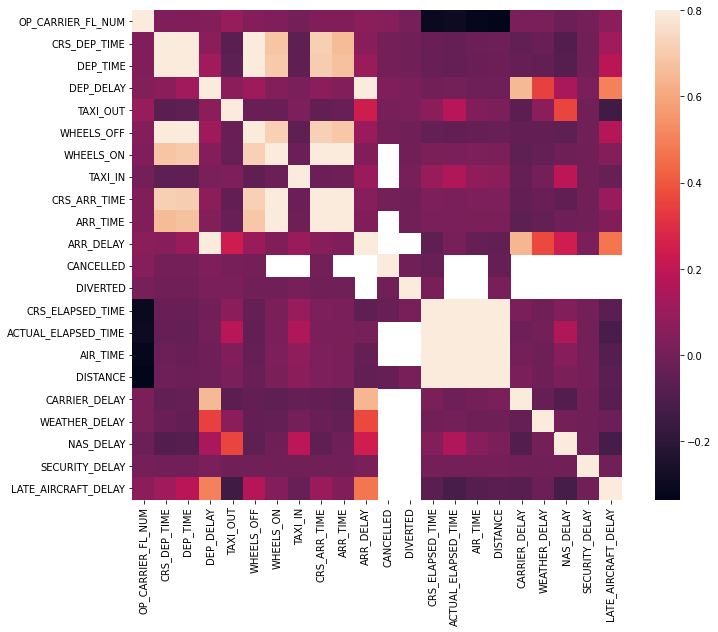

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);

There seems to be a discrepancy between arrival and deprture delay. At low levels of departure delay, arrival delay can appear "out of nowhere".

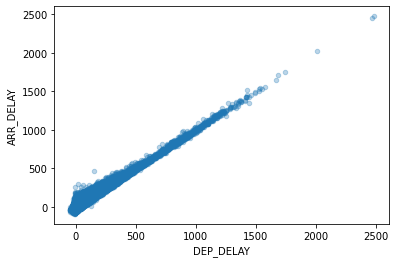

In [ ]:
# examine relationship between arrival delay and deprture delay
delays_train.plot(kind="scatter", x="DEP_DELAY", y="ARR_DELAY",
             alpha=0.3)

Time to drop some more features to reduce how much the curse of dimensionality affects us

In [ ]:
# dropping flight number for obvious reasons
# dest and origin can't regress on
# all other are time-related features which can be approximated by arr_time, dep_time
delays_train = delays_train.drop(["OP_CARRIER_FL_NUM", "DEST", "ORIGIN", "WHEELS_ON", "WHEELS_OFF", "TAXI_OUT",
                                  "TAXI_IN"], axis = 1)
delays_train.shape

(929775, 19)

In [ ]:
delays_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929775 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              929775 non-null  object 
 1   OP_CARRIER           929775 non-null  object 
 2   CRS_DEP_TIME         929775 non-null  int64  
 3   DEP_TIME             907197 non-null  float64
 4   DEP_DELAY            906376 non-null  float64
 5   CRS_ARR_TIME         929775 non-null  int64  
 6   ARR_TIME             905958 non-null  float64
 7   ARR_DELAY            903989 non-null  float64
 8   CANCELLED            929775 non-null  float64
 9   DIVERTED             929775 non-null  float64
 10  CRS_ELAPSED_TIME     929771 non-null  float64
 11  ACTUAL_ELAPSED_TIME  904350 non-null  float64
 12  AIR_TIME             904350 non-null  float64
 13  DISTANCE             929775 non-null  float64
 14  CARRIER_DELAY        168565 non-null  float64
 15  WEATHER_DELAY    

# Data Cleaning

Canceled flight are flights that never happened, and therefore no delay. We will be be removing cancelled flights from the training set. 

In [ ]:
delays_train.CANCELLED.unique()

array([0., 1.])

In [ ]:
delays_train = delays_train[(delays_train['CANCELLED'] == 0)]
delays_train.head()

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,1517,1512.0,-5.0,1745,1722.0,-23.0,0.0,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,1115,1107.0,-8.0,1254,1230.0,-24.0,0.0,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,1335,1330.0,-5.0,1649,1636.0,-13.0,0.0,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,1546,1552.0,6.0,1756,1754.0,-2.0,0.0,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,630,650.0,20.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN


Furthermore, the only thing that consitutes an overall flight delay is if the scheduled arrival time is exceeded.

In [ ]:
delays_train = delays_train[(delays_train['ARR_DELAY'] > 0)]


In [ ]:
delays_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306742 entries, 4 to 999998
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              306742 non-null  object 
 1   OP_CARRIER           306742 non-null  object 
 2   CRS_DEP_TIME         306742 non-null  int64  
 3   DEP_TIME             306742 non-null  float64
 4   DEP_DELAY            306563 non-null  float64
 5   CRS_ARR_TIME         306742 non-null  int64  
 6   ARR_TIME             306742 non-null  float64
 7   ARR_DELAY            306742 non-null  float64
 8   CANCELLED            306742 non-null  float64
 9   DIVERTED             306742 non-null  float64
 10  CRS_ELAPSED_TIME     306742 non-null  float64
 11  ACTUAL_ELAPSED_TIME  306742 non-null  float64
 12  AIR_TIME             306742 non-null  float64
 13  DISTANCE             306742 non-null  float64
 14  CARRIER_DELAY        168565 non-null  float64
 15  WEATHER_DELAY    

Check to see if there's any missing values in the data

In [ ]:
incomplete_rows = delays_train[delays_train.isnull().any(axis=1)].head()
incomplete_rows

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4,2018-01-01,UA,630,650.0,20.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN
20,2018-01-01,UA,830,844.0,14.0,1049,1055.0,6.0,0.0,0.0,139.0,131.0,108.0,631.0,NaN,NaN,NaN,NaN,NaN
24,2018-01-01,UA,1343,1351.0,8.0,1959,2013.0,14.0,0.0,0.0,256.0,262.0,214.0,1874.0,NaN,NaN,NaN,NaN,NaN
39,2018-01-01,UA,1627,1624.0,-3.0,1938,1944.0,6.0,0.0,0.0,191.0,200.0,156.0,1065.0,NaN,NaN,NaN,NaN,NaN
68,2018-01-01,UA,2100,2111.0,11.0,459,500.0,1.0,0.0,0.0,299.0,289.0,269.0,2425.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="constant", fill_value=0.0)

In [ ]:
delays_num = delays_train.drop("OP_CARRIER", axis=1)

imputer.fit(delays_num)
X = imputer.transform(delays_num)
delays_train = pd.DataFrame(X, columns=delays_num.columns,
                          index=delays_num.index)

delays_train

,FL_DATE,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4,2018-01-01,630,650.0,20.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0
11,2018-01-01,2059,2300.0,121.0,2311,120.0,129.0,0.0,0.0,72.0,80.0,48.0,316.0,121.0,0.0,8.0,0.0,0.0
14,2018-01-01,2114,2230.0,76.0,15,128.0,73.0,0.0,0.0,121.0,118.0,99.0,763.0,0.0,11.0,0.0,0.0,62.0
15,2018-01-01,653,747.0,54.0,930,1025.0,55.0,0.0,0.0,337.0,338.0,302.0,2218.0,54.0,0.0,1.0,0.0,0.0
16,2018-01-01,1810,1922.0,72.0,2136,2201.0,25.0,0.0,0.0,386.0,339.0,319.0,2500.0,7.0,0.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999991,2018-02-24,1433,1450.0,17.0,1622,1626.0,4.0,0.0,0.0,109.0,96.0,78.0,573.0,0.0,0.0,0.0,0.0,0.0
999992,2018-02-24,1652,1657.0,5.0,1859,1906.0,7.0,0.0,0.0,127.0,129.0,98.0,573.0,0.0,0.0,0.0,0.0,0.0
999994,2018-02-24,1642,2001.0,199.0,1910,2236.0,206.0,0.0,0.0,88.0,95.0,63.0,350.0,5.0,0.0,7.0,0.0,194.0
999995,2018-02-24,1501,1838.0,217.0,1530,1931.0,241.0,0.0,0.0,89.0,113.0,65.0,350.0,40.0,0.0,24.0,0.0,177.0


Check if any incomplete rows remain

In [ ]:
check_incomplete_rows = delays_train[delays_train.isnull().any(axis=1)].head()
check_incomplete_rows

(306742, 18)

In [ ]:
delays = delays_train.drop("ARR_DELAY", axis=1) # drop labels for training set
delays_labels = delays_train["ARR_DELAY"].copy()

Do the same for test so they are same shape, and missing values are filled

In [ ]:
delays_Test = delays_test.drop(["OP_CARRIER_FL_NUM", "DEST", "ORIGIN", "WHEELS_ON", "WHEELS_OFF", "TAXI_OUT",
                                  "TAXI_IN", "FL_DATE", "OP_CARRIER"], axis = 1)

delays_test_num = delays_Test.drop("ARR_DELAY", axis=1)
delays_test_labels = delays_Test["ARR_DELAY"].copy()
imputer.fit(delays_test_num)
X = imputer.transform(delays_test_num)
delays_Test = pd.DataFrame(X, columns=delays_test_num.columns,
                          index=delays_test_num.index)


delays_Test

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
9,1601.0,1559.0,-2.0,1813.0,1756.0,0.0,0.0,252.0,237.0,217.0,1482.0,0.0,0.0,0.0,0.0,0.0
34,1758.0,1751.0,-7.0,2120.0,2059.0,0.0,0.0,142.0,128.0,112.0,955.0,0.0,0.0,0.0,0.0,0.0
35,950.0,948.0,-2.0,1516.0,1500.0,0.0,0.0,206.0,192.0,173.0,1482.0,0.0,0.0,0.0,0.0,0.0
43,2217.0,2235.0,18.0,14.0,8.0,0.0,0.0,237.0,213.0,194.0,1452.0,0.0,0.0,0.0,0.0,0.0
45,1710.0,1703.0,-7.0,2057.0,2041.0,0.0,0.0,167.0,158.0,133.0,1172.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999968,1800.0,1753.0,-7.0,1902.0,1845.0,0.0,0.0,62.0,52.0,28.0,119.0,0.0,0.0,0.0,0.0,0.0
999982,1720.0,1708.0,-12.0,1843.0,1823.0,0.0,0.0,83.0,75.0,54.0,274.0,0.0,0.0,0.0,0.0,0.0
999988,1724.0,1716.0,-8.0,1859.0,1832.0,0.0,0.0,95.0,76.0,65.0,313.0,0.0,0.0,0.0,0.0,0.0
999989,1539.0,1533.0,-6.0,1654.0,1647.0,0.0,0.0,75.0,74.0,51.0,313.0,0.0,0.0,0.0,0.0,0.0


# Linear Regression:

In [ ]:
# Finding the mean of all positive arrival delay so that we can assess our RMSE
print(np.mean(delays_test[delays_test['ARR_DELAY'] > 0]['ARR_DELAY']))

42.63772213247173


In [ ]:
# Function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.linear_model import LinearRegression

delays = delays.drop("FL_DATE", axis=1)
lin_reg = LinearRegression()
lin_reg.fit(delays, delays_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = lin_reg.predict(delays)
lin_mse = mean_squared_error(delays_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.27030964690579695

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, delays, delays_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [0.02470981 0.36281894 0.02464491 0.02584366 0.483478  ]
Mean: 0.18429906273778002
Standard deviation: 0.19871772810652555


Perform on test set:

In [ ]:
delays_test_labels = delays_test_labels.fillna(0)

final_predictions = lin_reg.predict(delays_Test)
final_mse = mean_squared_error(delays_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

21.589889470421753

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(delays, delays_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
predictions = forest_reg.predict(delays)
forest_mse = mean_squared_error(delays_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.2647421229607245

In [ ]:
forest_scores = cross_val_score(forest_reg, delays, delays_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.36793604 3.92370628 2.41311878 4.80511387 2.97519146]
Mean: 3.4970132859670633
Standard deviation: 0.8193876137219263


Perform on test set:

In [ ]:
final_predictions = forest_reg.predict(delays_Test)
final_mse = mean_squared_error(delays_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

15.470397662787619

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(delays, delays_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
predictions = tree_reg.predict(delays)
tree_mse = mean_squared_error(delays_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
tree_scores = cross_val_score(tree_reg, delays, delays_labels,
                                scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [4.2046229  4.72198088 3.22437435 5.36194977 3.90760556]
Mean: 4.284106693568704
Standard deviation: 0.7245112716399974


Perform on Test Set:

In [ ]:
final_predictions = tree_reg.predict(delays_Test)
final_mse = mean_squared_error(delays_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

15.485951097083914

# Parameter hypertuning

In [ ]:
param_grid = [
    {'n_estimators': [5,10, 20, 25, 30], 'max_features': [5, 10,15]},
    {'bootstrap': [False], 'n_estimators': [5,10, 20, 25,30], 'max_features': [5,6,7,8,9, 10,11,12,13,14,15]}
  ]


In [ ]:
# RandomizedSearch for RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

forest_reg = RandomForestRegressor(random_state = 42)

search = RandomizedSearchCV(forest_reg, param_grid, n_iter=7, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42)
search.fit(delays,delays_labels)
print(search.best_estimator_)


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForestRegressor(bootstrap=False, max_features=12, n_estimators=30,
                      random_state=42)


In [ ]:
param_grid = [
    {'max_features': [5,6,7,8,9,10,11,12,13,14,15]}
  ]

dectree_reg = DecisionTreeRegressor(random_state=42)

search = GridSearchCV(dectree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
search.fit(delays,delays_labels)
print(search.best_estimator_)

# Retraining the Models with Updated Parameters

## RandomForestRegressor Retrained

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_features = 12,bootstrap = False,n_estimators=30, random_state=42)
forest_reg.fit(delays, delays_labels)

RandomForestRegressor(bootstrap=False, max_features=12, n_estimators=30,
                      random_state=42)

In [ ]:
predictions = forest_reg.predict(delays)
forest_mse = mean_squared_error(delays_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [ ]:
forest_scores = cross_val_score(forest_reg, delays, delays_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.12030766 3.33849525 2.13079934 5.57872446 2.78571803]
Mean: 3.390808947841119
Standard deviation: 1.1676164800717672


Perform on test set:

In [ ]:
final_predictions = forest_reg.predict(delays_Test)
final_mse = mean_squared_error(delays_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

15.437972256155541

## DecisionTreeRegressor Retrained

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_features = 15,random_state=42)
tree_reg.fit(delays, delays_labels)

DecisionTreeRegressor(max_features=15, random_state=42)

In [ ]:
predictions = tree_reg.predict(delays)
tree_mse = mean_squared_error(delays_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
tree_scores = cross_val_score(tree_reg, delays, delays_labels,
                                scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [4.50817481 4.84569475 3.23685217 5.68632479 4.27021196]
Mean: 4.509451697393713
Standard deviation: 0.7968483556492827


Perform on Test Set:

In [ ]:
final_predictions = tree_reg.predict(delays_Test)
final_mse = mean_squared_error(delays_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

15.53496590081027